# Sampling Large Risk Assessment Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

All possible variations of x_11 included.

In [2]:
x_11_1 = pd.read_csv("x_11_1.csv")
x_11_05 = pd.read_csv("x_11_0.5.csv")
x_11_02 = pd.read_csv("x_11_0.2.csv")

In [3]:
df = pd.concat([x_11_1,x_11_05,x_11_02])
df.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,output
0,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.2,4.03750
1,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.3,4.04075
2,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.5,4.04725
3,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.9,4.06025
4,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,1.0,4.06350


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145725 entries, 0 to 1048574
Data columns (total 11 columns):
x_11      float64
x_21      float64
x_22      float64
x_31      float64
x_32      float64
x_41      float64
x_51      float64
x_52      float64
x_61      float64
x_62      float64
output    float64
dtypes: float64(11)
memory usage: 288.0 MB


In [5]:
df.x_11.value_counts()

1.0    1048575
0.2    1048575
0.5    1048575
Name: x_11, dtype: int64

In [6]:
df.x_21.value_counts()

1.0    1171875
0.8    1171875
0.4     801975
Name: x_21, dtype: int64

In [7]:
df.x_22.value_counts()

0.4    703125
0.2    703125
0.6    703125
0.8    567600
1.0    468750
Name: x_22, dtype: int64

In [8]:
df.empty

False

### Correlation matrix for all features in overall dataset

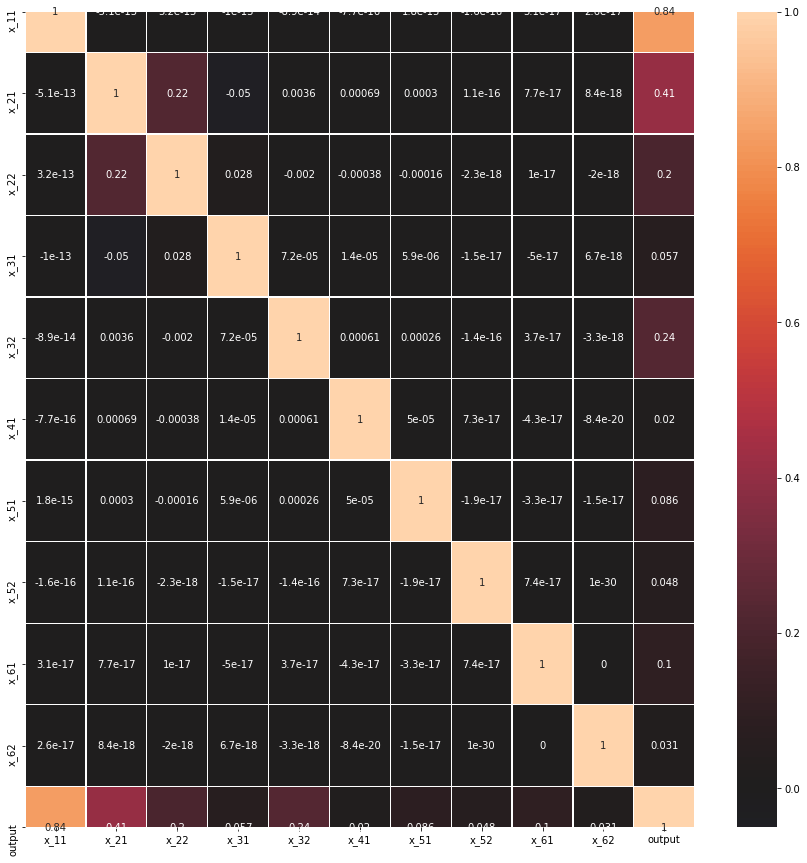

In [9]:
# Heatmaps will get fixed with a matplotlib version upgrade soon


correlation_matrix = df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

#### This is a vast population size which will most probably lead to model overfitting. I'm going to split the dataset using random sampling and stratififed sampling and then further reduce it by train test split.

The reasoning behind it is that I could discard the first rounds test data since both train and test data will have equal distributions if I try stratified sampling. We could change this strategy if required.

I'm doing random sampling just to compare.

### Stratified Sampling

A stratified sample is one that ensures that subgroups (strata) of a given population are each adequately represented within the whole sample population of a research study.

We need to decide how many categories we should stratify the dataset into, this will be dependent on the target variable/ output variable.

In [10]:
df_correlations = df.corr()
df_correlations['output'].sort_values(ascending=False)

output    1.000000
x_11      0.837853
x_21      0.409113
x_32      0.235721
x_22      0.202388
x_61      0.099875
x_51      0.085793
x_31      0.056595
x_52      0.048459
x_62      0.030841
x_41      0.019574
Name: output, dtype: float64

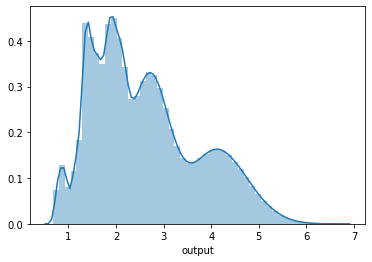

In [11]:
sns.distplot(df.output)
plt.show()

From the distribution categories will be pretty uneven i.e. the minimum class and maximum class have very few samples compared to the median categories.

***Another thing we can do using this informaation is that we could remove some middle samples randomly.

### I'm going to make another column, which will have a score 1-5 defining risk categories of users.

1: No risks : observations <= 1.5
        
2: Low risk taker : 1.5 < observations <= 2.5
        
3: Medium risk taker : 2.5 < observations <= 3.5
        
4: Likes to take risks : 3.5 < observations <= 4.5
        
5: High risk taker : 4.5 < observations


It would be easier to take samples from these classes

In [12]:
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
#All observations below 1.5 in output column will get marked as category 1
df.loc[df['output'] <= 1.5, 'categories'] = 1
#Observations from 1.5 to 2.5 marked as category 2
df.loc[(df['output'] > 1.5) & (df['output'] <= 2.5) , 'categories'] = 2
#Observations from 2.5 to 3.5 marked as category 3
df.loc[(df['output'] > 2.5) & (df['output'] <= 3.5) , 'categories'] = 3
#Observations from 3.5 to 4.5 marked as category 4
df.loc[(df['output'] > 3.5) & (df['output'] <= 4.5) , 'categories'] = 4
#Observations above 4.5 marked as category 5
df.loc[df['output']>4.5, 'categories'] = 5

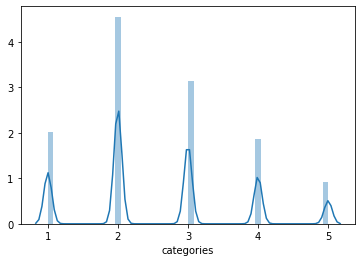

In [13]:
sns.distplot(df.categories)

#### The counts of each class:

In [14]:
df.categories.value_counts()

2.0    1146322
3.0     790881
1.0     507765
4.0     470923
5.0     229834
Name: categories, dtype: int64

Will save this file for future use.

In [15]:
#df.to_csv("risk_data_w_categories_13oct2019.csv")

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
# n_splits= number of shuffles and iterations

#loop to stratify by category and store in train and test set
for train_index,test_index in split.split(df,df['categories']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [17]:
strat_test_set.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,output,categories
362505,0.2,1.0,1.0,0.4,0.3,0.4,0.65,0.50,0.9,0.2,1.696900,2.0
748781,1.0,0.8,1.0,0.6,1.0,0.4,0.65,0.80,0.9,0.3,4.830400,5.0
364578,0.5,1.0,1.0,0.4,0.3,0.4,0.60,0.60,1.0,0.9,2.840650,3.0
487428,1.0,0.8,0.4,0.8,0.1,0.8,1.00,0.65,1.0,0.9,4.123420,4.0
159893,0.5,1.0,0.6,1.0,0.3,0.4,1.00,0.50,0.2,0.9,2.682875,3.0


#### Variance of stratified divisions

In [18]:
strat_train_set.var()

x_11          0.108886
x_21          0.054928
x_22          0.074285
x_31          0.080427
x_32          0.117769
x_41          0.022373
x_51          0.041607
x_52          0.010001
x_61          0.130406
x_62          0.101638
output        1.227472
categories    1.298816
dtype: float64

In [19]:
strat_test_set.var()

x_11          0.108895
x_21          0.054959
x_22          0.074291
x_31          0.080293
x_32          0.117812
x_41          0.022391
x_51          0.041551
x_52          0.009999
x_61          0.130386
x_62          0.101512
output        1.227760
categories    1.298817
dtype: float64

In [20]:
strat_train_set.shape

(2202007, 12)

#### Both test and train sets have equal variance in samples, so I will pick up the test set for further use

In [21]:
strat_test_set.shape

(943718, 12)

In [22]:
df.shape

(3145725, 12)

Correlations of features in the stratified test set with the target variables.

In [23]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)

output        1.000000
categories    0.967024
x_11          0.837681
x_21          0.410021
x_32          0.235633
x_22          0.201461
x_61          0.099862
x_51          0.087410
x_31          0.054702
x_52          0.048607
x_62          0.031009
x_41          0.019345
Name: output, dtype: float64

In [24]:
#correlation of other variables with target variable
strat_test['categories'].sort_values(ascending=False)

categories    1.000000
output        0.967024
x_11          0.811650
x_21          0.410310
x_32          0.226888
x_22          0.195734
x_61          0.093768
x_51          0.079581
x_31          0.049576
x_52          0.043635
x_62          0.023622
x_41          0.018089
Name: categories, dtype: float64

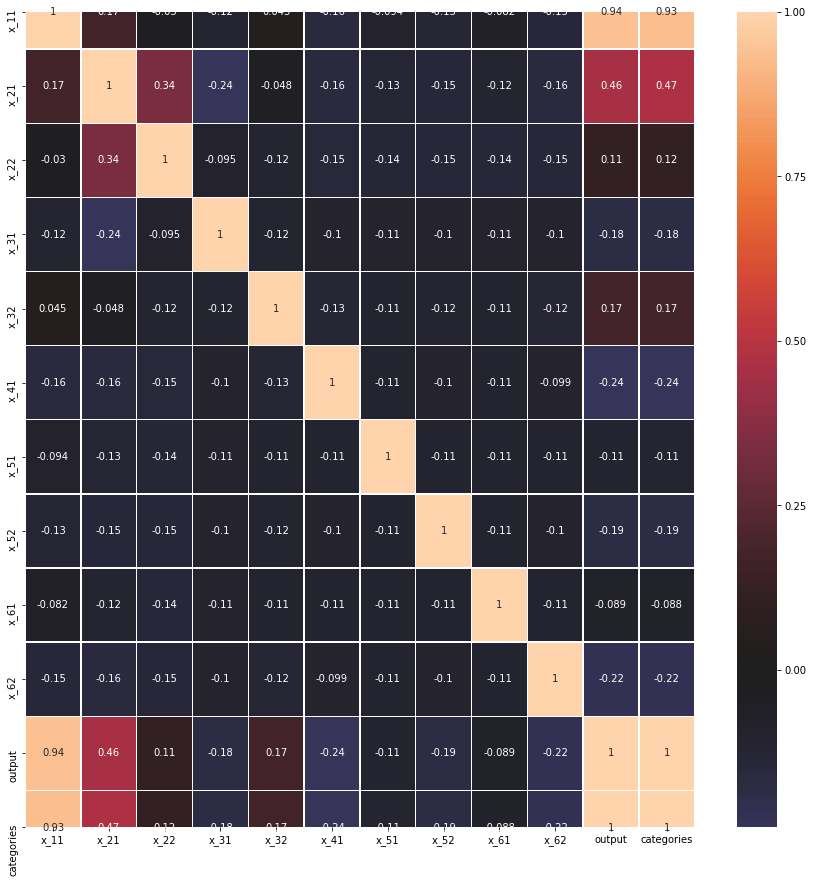

In [25]:
correlation_matrix_strat = strat_test.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_strat, center=0, annot=True, linewidths=.3)

In [26]:
strat_test_set.to_csv("risk_stratified_sample_14oct2019.csv")

### Categorical Random Sampling

In random sampling I'm reducing the samples taken from largely populated categories such as 2, 3, 4. It's done based on fraction size but we can easily just decide number of samples (we can decide later).

In [27]:
df.loc[df.categories==1].shape

(507765, 12)

In [28]:
category_1 = df.loc[df.categories==1].sample(n=40000)
category_1.shape

(40000, 12)

In [29]:
df.loc[df.categories==2].shape

(1146322, 12)

In [30]:
category_2 = df.loc[df.categories==2].sample(n=40000)
category_2.shape

(40000, 12)

In [31]:
df.loc[df.categories==3].shape

(790881, 12)

In [32]:
category_3 = df.loc[df.categories==3].sample(n=40000)
category_3.shape

(40000, 12)

In [33]:
df.loc[df.categories==4].shape

(470923, 12)

In [34]:
category_4 = df.loc[df.categories==4].sample(n=40000)
category_4.shape

(40000, 12)

In [35]:
df.loc[df.categories==5].shape

(229834, 12)

In [36]:
category_5 = df.loc[df.categories==5].sample(n=40000)
category_5.shape

(40000, 12)

In [37]:
random_sample_df = pd.concat([category_1,category_2,category_3,category_4,category_5])

In [38]:
random_sample_df.shape

(200000, 12)

In [39]:
rand_samples = random_sample_df.corr()

In [40]:
rand_samples['categories'].sort_values(ascending=False)

categories    1.000000
output        0.977241
x_11          0.872116
x_21          0.552051
x_32          0.315102
x_22          0.276305
x_61          0.155347
x_51          0.135556
x_31          0.087974
x_52          0.071395
x_62          0.045850
x_41          0.030169
Name: categories, dtype: float64

Variance of features in random sample

In [41]:
random_sample_df.var()

x_11          0.120901
x_21          0.053112
x_22          0.076034
x_31          0.080039
x_32          0.119241
x_41          0.022452
x_51          0.043385
x_52          0.009948
x_61          0.130642
x_62          0.102117
output        1.837670
categories    2.000010
dtype: float64

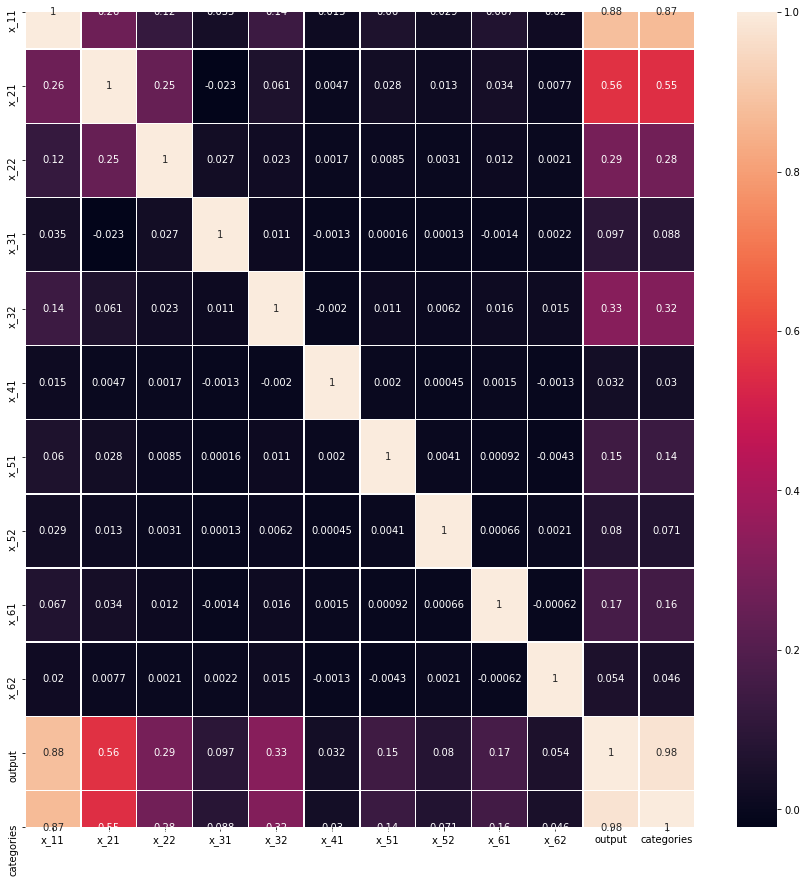

In [42]:
correlation_matrix_rand = random_sample_df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_rand, annot=True,linewidths=0.3)

In [53]:
random_sample_df.to_csv("risk_cat_random_sample_17oct2019.csv")

### Completely Random Sampling 

In [44]:
X_random = df.drop(columns=['output','categories'])
X_random.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62
0,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.2
1,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.3
2,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.5
3,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.9
4,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,1.0


In [45]:
Y_random = pd.DataFrame(df['categories'])
Y_random.head()

,categories
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random,Y_random,random_state=42, test_size=0.1)

In [47]:
X_train.shape

(2831152, 10)

In [48]:
X_test.shape

(314573, 10)

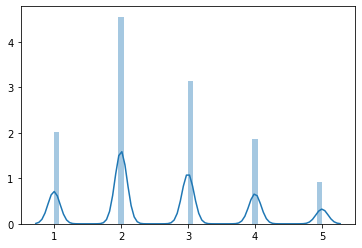

In [49]:
sns.distplot(Y_test)

In [50]:
random_set = pd.concat([X_test, Y_test], axis=1)
random_set.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,categories
830691,0.5,0.4,0.2,0.4,0.1,0.8,0.65,0.65,0.2,0.3,1.0
839783,0.5,0.4,0.2,0.4,0.9,0.4,0.50,0.80,0.9,0.9,2.0
389222,1.0,1.0,1.0,0.2,1.0,0.5,0.50,0.60,0.1,0.5,4.0
205873,0.5,1.0,0.6,0.4,0.1,0.8,0.60,0.70,0.1,0.9,2.0
245113,0.5,1.0,0.8,1.0,0.9,0.5,0.65,0.70,0.5,0.9,3.0


In [52]:
random_set.to_csv("risk_full_random_sample_17oct19.csv")

#### Should come up with some error measure to test the difference